# CS156 Assignment 1

## Loading Data

In [2]:
import pandas as pd
import json

# Load the JSON file into a Python dictionary
with open('/Users/minjaekim/Projects/bereal-ml-project/data/iVkH1ljxruQMdiX6bixQvMbcJBu2-14RWaeP4zbC-mXBQf8Up7/memories.json') as f:
    memories_data = json.load(f)

# Create a list to store the relevant data for each memory
memories_list = []

# Loop through each memory and extract the relevant data
for memory in memories_data:
    front_image = memory['frontImage']['path']
    back_image = memory['backImage']['path']
    is_late = memory['isLate']
    date = memory['date']
    taken_time = memory['takenTime']
    bereal_moment = memory['berealMoment']
    # Use .get() to safely access the 'location' field, return None if not present
    location = memory.get('location', None)
    
    if location:
        latitude = location.get('latitude', None)
        longitude = location.get('longitude', None)
    else:
        latitude, longitude = None, None  # No location available
    
    # Add to the list as a dictionary
    memories_list.append({
        'front_image': front_image,
        'back_image': back_image,
        'is_late': is_late,
        'date': date,
        'taken_time': taken_time,
        'bereal_moment': bereal_moment,
        'latitude': latitude,
        'longitude': longitude
    })

# Convert the list of memories to a Pandas DataFrame
memories_df = pd.DataFrame(memories_list)

# Display the first few rows of the DataFrame
memories_df.head()

,front_image,back_image,is_late,date,taken_time,bereal_moment,latitude,longitude
0,/Photos/iVkH1ljxruQMdiX6bixQvMbcJBu2/post/UWat...,/Photos/iVkH1ljxruQMdiX6bixQvMbcJBu2/post/2ESG...,False,2024-10-08T00:00:00.000Z,2024-10-08T17:48:30.362Z,2024-10-08T17:48:05.346Z,37.790025,-122.401512
1,/Photos/iVkH1ljxruQMdiX6bixQvMbcJBu2/post/g6iG...,/Photos/iVkH1ljxruQMdiX6bixQvMbcJBu2/post/ITny...,True,2024-10-07T00:00:00.000Z,2024-10-08T02:08:28.988Z,2024-10-08T00:32:05.356Z,37.783693,-122.409564
2,/Photos/iVkH1ljxruQMdiX6bixQvMbcJBu2/post/FddJ...,/Photos/iVkH1ljxruQMdiX6bixQvMbcJBu2/post/H0_D...,False,2024-10-07T00:00:00.000Z,2024-10-08T02:18:18.197Z,2024-10-08T00:32:05.356Z,37.784089,-122.409181
3,/Photos/iVkH1ljxruQMdiX6bixQvMbcJBu2/post/aolL...,/Photos/iVkH1ljxruQMdiX6bixQvMbcJBu2/post/x6c-...,True,2024-10-06T00:00:00.000Z,2024-10-07T00:43:21.826Z,2024-10-06T20:51:05.354Z,37.784088,-122.409180
4,/Photos/iVkH1ljxruQMdiX6bixQvMbcJBu2/post/_F6f...,/Photos/iVkH1ljxruQMdiX6bixQvMbcJBu2/post/0fxu...,False,2024-10-06T00:00:00.000Z,2024-10-07T10:26:33.769Z,2024-10-06T20:51:05.354Z,37.784089,-122.409181


## EDA

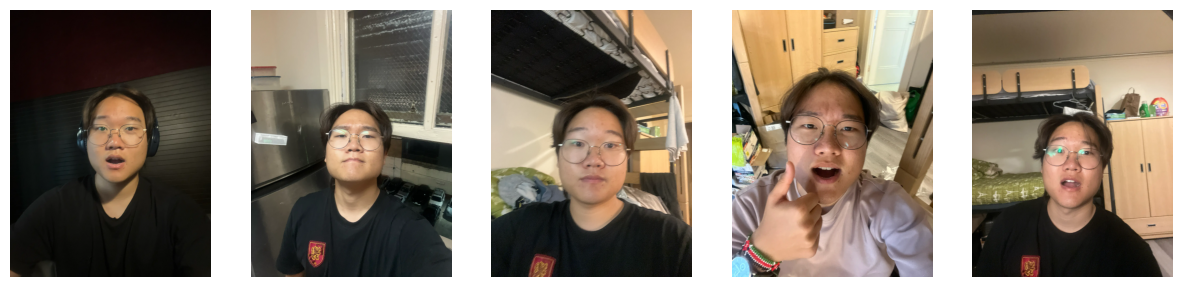

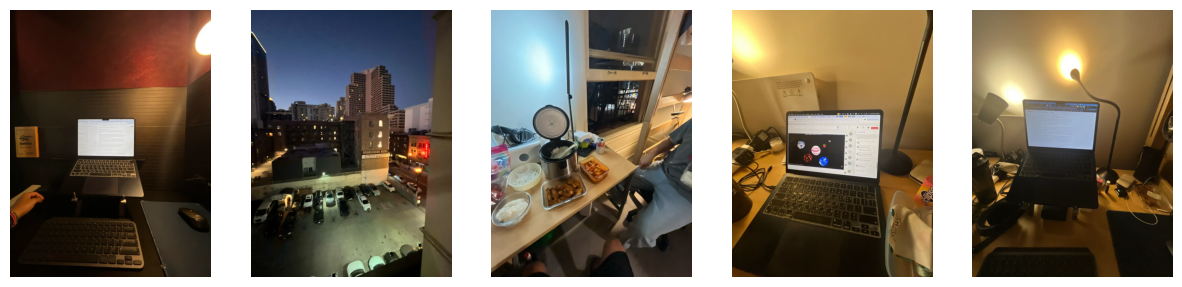

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

# Function to display images
def display_images(image_paths):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))
    for ax, image_path in zip(axes, image_paths):
        img = Image.open(image_path)  # Open the image from the local file
        ax.imshow(img)  # Display the image
        ax.axis('off')  # Remove axes
    plt.show()

# Correct the image paths in the DataFrame by replacing '/Photos/' with 'data/Photos/'
memories_df['front_image'] = memories_df['front_image'].apply(lambda x: x.replace('/Photos/iVkH1ljxruQMdiX6bixQvMbcJBu2', '/Users/minjaekim/Projects/bereal-ml-project/data/iVkH1ljxruQMdiX6bixQvMbcJBu2-14RWaeP4zbC-mXBQf8Up7/Photos'))
memories_df['back_image'] = memories_df['back_image'].apply(lambda x: x.replace('/Photos/iVkH1ljxruQMdiX6bixQvMbcJBu2', '/Users/minjaekim/Projects/bereal-ml-project/data/iVkH1ljxruQMdiX6bixQvMbcJBu2-14RWaeP4zbC-mXBQf8Up7/Photos'))

# Get the first 5 front images from the DataFrame
front_image_paths = memories_df['front_image'].head(5)
back_image_paths = memories_df['back_image'].head(5)

# Display the first 5 front images
display_images(front_image_paths)
display_images(back_image_paths)

In [4]:
print(memories_df.info())
print(memories_df.describe())
print(memories_df.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   front_image    955 non-null    object 
 1   back_image     955 non-null    object 
 2   is_late        955 non-null    bool   
 3   date           955 non-null    object 
 4   taken_time     955 non-null    object 
 5   bereal_moment  955 non-null    object 
 6   latitude       809 non-null    float64
 7   longitude      809 non-null    float64
dtypes: bool(1), float64(2), object(5)
memory usage: 53.3+ KB
None
         latitude   longitude
count  809.000000  809.000000
mean    22.935719   56.221830
std     17.799800   81.492029
min    -24.016484 -122.471753
25%     -1.277712   36.784795
50%     37.178842   78.369480
75%     37.559110  127.146865
max     53.218858  140.384923
front_image        0
back_image         0
is_late            0
date               0
taken_time         0
bereal_moment 

In [5]:
import folium

# Initialize a map at a central location
m = folium.Map(location=[memories_df['latitude'].mean(), memories_df['longitude'].mean()], zoom_start=5)

# Add markers for each BeReal post
for i, row in memories_df.iterrows():
    if not pd.isnull(row['latitude']) and not pd.isnull(row['longitude']):
        folium.Marker([row['latitude'], row['longitude']], popup=row['bereal_moment']).add_to(m)

# Show the map
m


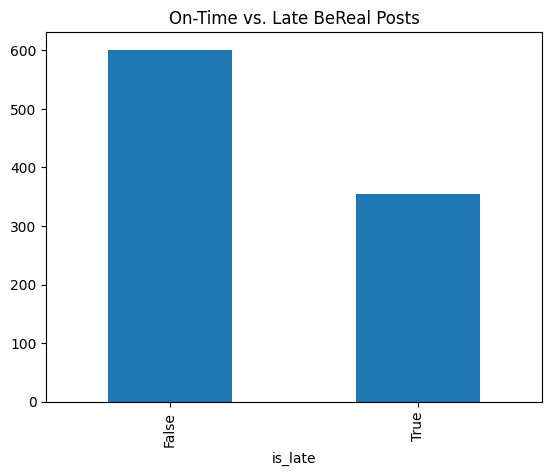

In [6]:
# Plot the count of 'on-time' vs 'late' posts
memories_df['is_late'].value_counts().plot(kind='bar', title='On-Time vs. Late BeReal Posts')
plt.show()


In [7]:
# Convert the 'takenTime' column to datetime
memories_df['taken_time'] = pd.to_datetime(memories_df['taken_time'])

# Now you can access .dt attributes for time-based exploration
memories_df['day_of_week'] = memories_df['taken_time'].dt.day_name()
memories_df['hour_of_day'] = memories_df['taken_time'].dt.hour

# Display the new columns to check
print(memories_df[['taken_time', 'day_of_week', 'hour_of_day']].tail())



                          taken_time day_of_week  hour_of_day
950 2022-08-03 17:48:52.664000+00:00   Wednesday           17
951 2022-08-02 12:33:01.780000+00:00     Tuesday           12
952 2022-08-01 22:03:56.966000+00:00      Monday           22
953 2022-07-31 14:55:15.583000+00:00      Sunday           14
954 2022-07-27 18:43:39.214000+00:00   Wednesday           18


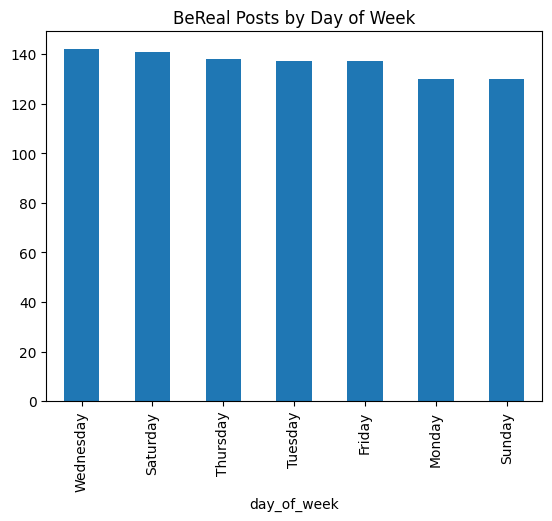

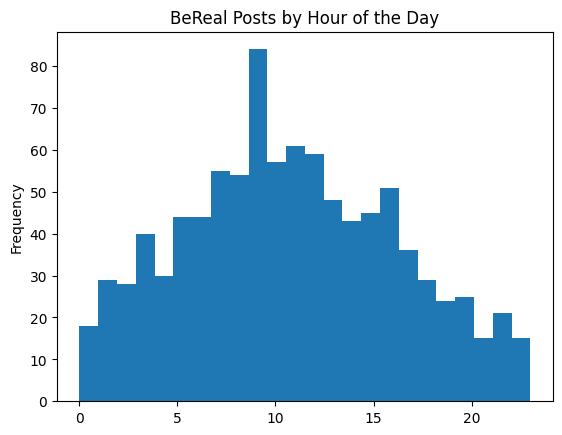

In [8]:
# Plot distribution of BeReal moments by day of the week
memories_df['day_of_week'].value_counts().plot(kind='bar', title='BeReal Posts by Day of Week')
plt.show()

# Plot distribution by hour of the day
memories_df['hour_of_day'].plot(kind='hist', bins=24, title='BeReal Posts by Hour of the Day')
plt.show()


## Labeling

In [13]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming you have a DataFrame named 'memories_df'
# We will add a new column 'is_with_people' that you'll manually label
memories_df['is_with_people'] = None  # Placeholder for manual labeling

# Create widgets for labeling
label_widget = widgets.ToggleButtons(
    options=[True, False],
    description='With People:'
)

save_button = widgets.Button(description="Save Label")
image_index = 0

# Display the first image or relevant metadata
img_display = widgets.Output()

def show_memory(index):
    with img_display:
        clear_output(wait=True)
        print(f"Memory {index+1} out of {len(memories_df)}")
        print(f"Front Image Path: {memories_df.loc[index, 'front_image']}")
        print(f"Back Image Path: {memories_df.loc[index, 'back_image']}")
        print(f"Location: {memories_df.loc[index, 'latitude']}, {memories_df.loc[index, 'longitude']}")
        print(f"Date/Time: {memories_df.loc[index, 'taken_time']}")
        # You can also display the images here using libraries like PIL or OpenCV, if needed.
        # Get the paths for the front and back images
        front_image_path = memories_df.loc[index, 'front_image']
        back_image_path = memories_df.loc[index, 'back_image']
        
        # Open the images using PIL
        img1 = Image.open(front_image_path)
        img2 = Image.open(back_image_path)

        # Display images side by side
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create 1 row, 2 columns
        axs[0].imshow(img1)
        axs[0].axis('off')  # Hide axis
        axs[0].set_title('Front Image')

        axs[1].imshow(img2)
        axs[1].axis('off')  # Hide axis
        axs[1].set_title('Back Image')

        plt.show()

# Function to save the label for the current memory
def save_label(b):
    global image_index
    # Save the label to the DataFrame
    memories_df.loc[image_index, 'is_with_people'] = label_widget.value
    
    # Move to the next image
    image_index += 1
    if image_index < len(memories_df):
        show_memory(image_index)  # Show the next memory
    else:
        with img_display:
            clear_output()
            print("All memories labeled!")

# Display the widgets
save_button.on_click(save_label)
display(img_display)
show_memory(image_index)
display(label_widget, save_button)


Output()

ToggleButtons(description='With People:', options=(True, False), value=True)

Button(description='Save Label', style=ButtonStyle())

In [83]:
memories_df.to_csv('labeled_memories.csv', index=False)


## Data splitting

In [90]:
memories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   front_image     955 non-null    object             
 1   back_image      955 non-null    object             
 2   is_late         955 non-null    bool               
 3   date            955 non-null    object             
 4   taken_time      955 non-null    datetime64[ns, UTC]
 5   bereal_moment   955 non-null    object             
 6   latitude        809 non-null    float64            
 7   longitude       809 non-null    float64            
 8   day_of_week     955 non-null    object             
 9   hour_of_day     955 non-null    int32              
 10  is_with_people  955 non-null    object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), int32(1), object(6)
memory usage: 71.9+ KB


In [104]:
from sklearn.model_selection import train_test_split

# Drop rows with NaN values in the features or target
memories_df_cleaned = memories_df.dropna()

# Define the features (X) and the target variable (y)
X = memories_df_cleaned[['latitude', 'longitude', 'hour_of_day', 'day_of_week', 'is_late']]
# For 'day_of_week', encoding it since it's categorical
X = pd.get_dummies(X, columns=['day_of_week'])
y = memories_df_cleaned['is_with_people']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(647, 11) (162, 11) (647,) (162,)


bool

In [107]:
# Convert y_train and y_test to integers (0 for False, 1 for True)
y_train = y_train.astype(int)
y_test = y_test.astype(int)



## Modeling

### Logistic Regression

#### Training

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


#### Evaluation

In [111]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.56
Confusion Matrix:
[[57 28]
 [43 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        85
           1       0.55      0.44      0.49        77

    accuracy                           0.56       162
   macro avg       0.56      0.56      0.55       162
weighted avg       0.56      0.56      0.56       162



### Gaussian Naive Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.55
Confusion Matrix:
[[51 34]
 [39 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.60      0.58        85
           1       0.53      0.49      0.51        77

    accuracy                           0.55       162
   macro avg       0.55      0.55      0.55       162
weighted avg       0.55      0.55      0.55       162



### Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)


In [116]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.72
Confusion Matrix:
[[63 22]
 [24 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        85
           1       0.71      0.69      0.70        77

    accuracy                           0.72       162
   macro avg       0.72      0.71      0.71       162
weighted avg       0.72      0.72      0.72       162



In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2']           # Number of features to consider at each split
}

# Initialize GridSearchCV with RandomForestClassifier
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Tuned Random Forest Accuracy: {accuracy_best_rf:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=

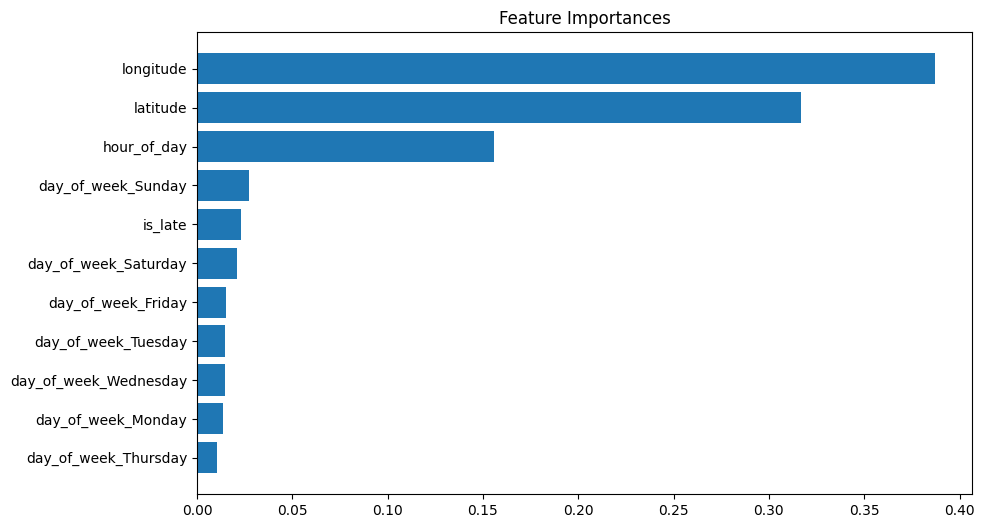

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importance from the best Random Forest model
feature_importances = best_rf_model.feature_importances_

# Plot feature importance
features = X_train.columns  # Original features
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), feature_importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()


### Considerations

Considerations:
- DONE Logistic regression for whether a post is late or not late
- DONE Label whether I am with or without people
    - With people is true only when people are in person and I am associated with them. Screens don't count, and people that I do not know do not count.
    - Mistake august 8, 2024. 
    - actually messed up august 17 2023, august 13, july 4 2023, june 15 2023, march 13 2023, november 16 2022
    - may 28 2023 missing
- Do some more EDA with the new label. Talk with ChatGPT about it.
- Double check with evaluation metric to ensure there is variety.
- Write equations and formulas and other things that go into explaining what's going on behind each of the models. 
- Ask GPT about Naive bayes with softmax
- Start the actual write-up

Labeling is done now so I can start modeling. 
